<a href="https://colab.research.google.com/github/Balogunhabeeb14/Personal-Projects/blob/main/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
random_state = 123

In [2]:
data=pd.read_csv('/content/encoded.csv')

In [3]:
data.head()

,Unnamed: 0,score,Location,Neigborhood,Type,Method,Age_range,Floor,FloorArea(Average),Frameworks,...,Wastheresufficientdesigninformation,Compositematerials,Werethestructuralelementconnectionsaccessible?,"Overall,weremostofthestructuralelementconnectionsseparatable?",Wastheresomecode/regulationthatdelaysthedeconstruction,Timeoftheyear,Estimatedtimeitwilltaketosortandprocesstherecoveredbuildingcomponents?,Deconstructionprojecttime,Maindriversthataffectthedeconstructionschedule?,Motivationfordeconstruction?
0,0,ND,3,2,3,2,2,2,3,3,...,1,5,4,2,4,3,3,2,2,3
1,1,ND,2,5,1,3,2,3,2,3,...,3,5,1,2,3,1,4,1,2,5
2,2,ND,5,5,1,1,5,2,4,3,...,2,4,2,4,1,3,5,5,5,4
3,3,D,3,3,5,2,3,4,5,4,...,2,2,1,2,4,4,3,4,2,2
4,4,D,3,2,3,1,4,2,1,1,...,2,5,4,2,1,4,1,5,1,3


In [4]:
df=data.copy()
df=df.drop(['Unnamed: 0'], axis=1)

In [5]:
df['score'] = df['score'].map({'D': 1, 'ND': 0})
df.head()

,score,Location,Neigborhood,Type,Method,Age_range,Floor,FloorArea(Average),Frameworks,Barrier,...,Wastheresufficientdesigninformation,Compositematerials,Werethestructuralelementconnectionsaccessible?,"Overall,weremostofthestructuralelementconnectionsseparatable?",Wastheresomecode/regulationthatdelaysthedeconstruction,Timeoftheyear,Estimatedtimeitwilltaketosortandprocesstherecoveredbuildingcomponents?,Deconstructionprojecttime,Maindriversthataffectthedeconstructionschedule?,Motivationfordeconstruction?
0,0,3,2,3,2,2,2,3,3,5,...,1,5,4,2,4,3,3,2,2,3
1,0,2,5,1,3,2,3,2,3,4,...,3,5,1,2,3,1,4,1,2,5
2,0,5,5,1,1,5,2,4,3,3,...,2,4,2,4,1,3,5,5,5,4
3,1,3,3,5,2,3,4,5,4,4,...,2,2,1,2,4,4,3,4,2,2
4,1,3,2,3,1,4,2,1,1,5,...,2,5,4,2,1,4,1,5,1,3


In [6]:
X = df.drop('score', axis=1)
y = df['score']

<Axes: >

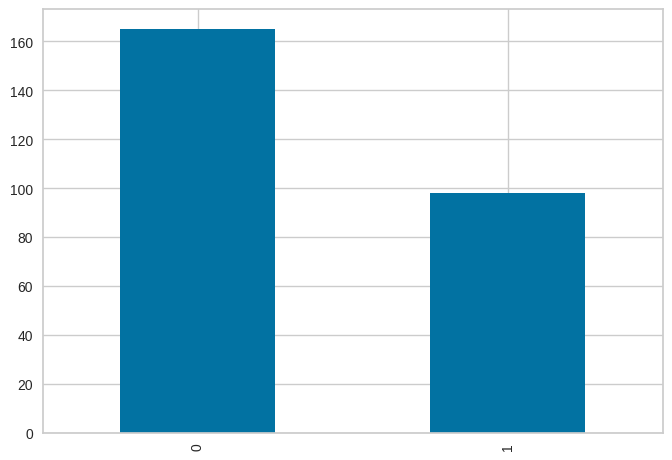

In [7]:
y.value_counts().plot.bar()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Class distribution before SMOTE: Counter({0: 136, 1: 74})
Class distribution after SMOTE: Counter({0: 136, 1: 136})


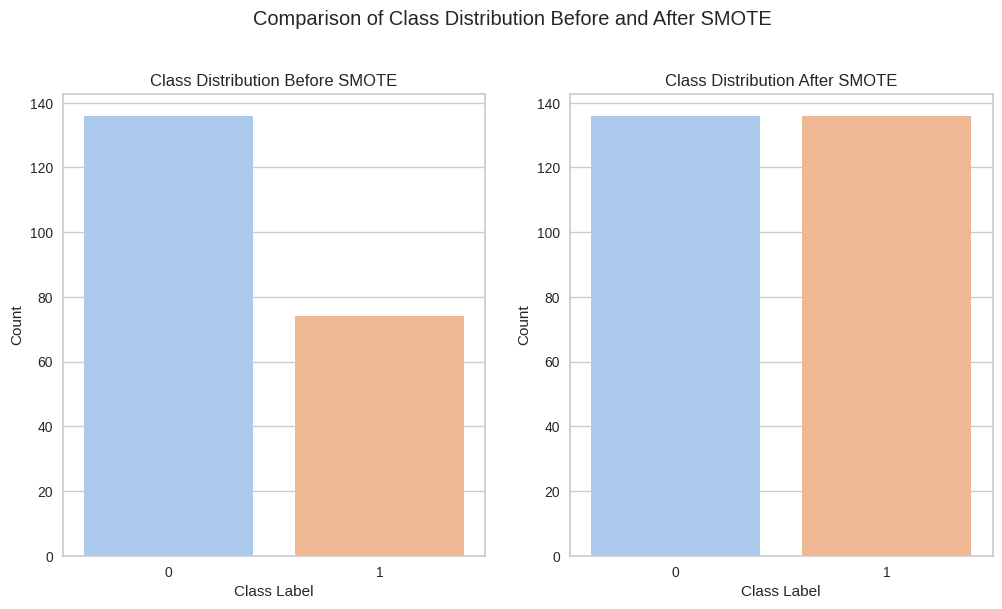

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

# Display the class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Visualize class distribution before and after SMOTE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='pastel')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class Label")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled, palette='pastel')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class Label")
plt.ylabel("Count")

plt.suptitle("Comparison of Class Distribution Before and After SMOTE", y=1.02)
plt.show()


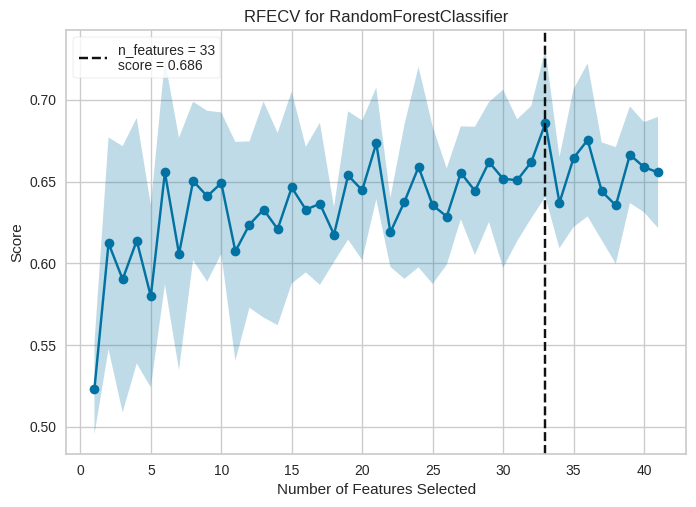

Selected Features Indices: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 23, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40]
Time taken: 805.6133165359497 seconds


In [10]:

import time

# Record the start time
start_time = time.time()

cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()

# Access the selected features
selected_features = visualizer.support_

# Print the indices of selected features
print("Selected Features Indices:", [i for i, selected in enumerate(selected_features) if selected])


# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken: {time_taken} seconds")


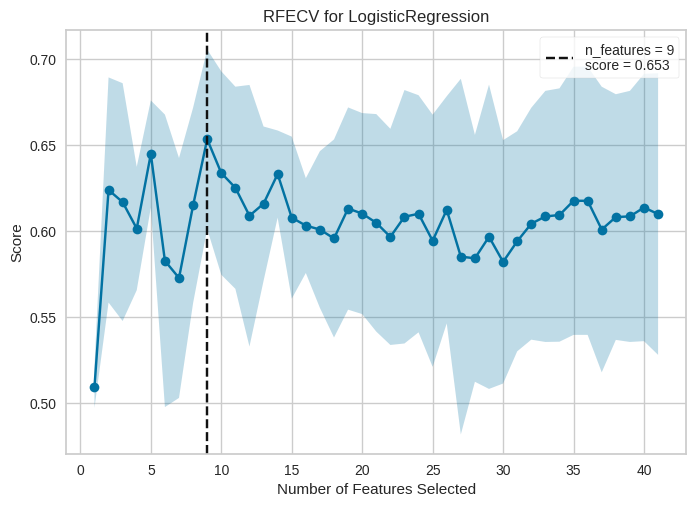

Selected Features Indices: [0, 1, 5, 13, 14, 22, 25, 28, 29]
Time taken: 55.06167435646057 seconds


In [11]:
import time

# Record the start time
start_time = time.time()

estimator = LogisticRegression(random_state=random_state)
visualizer = RFECV(estimator=estimator, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring='f1_weighted')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Access the selected features
selected_features = visualizer.support_

# Print the indices of selected features
print("Selected Features Indices:", [i for i, selected in enumerate(selected_features) if selected])

# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken: {time_taken} seconds")


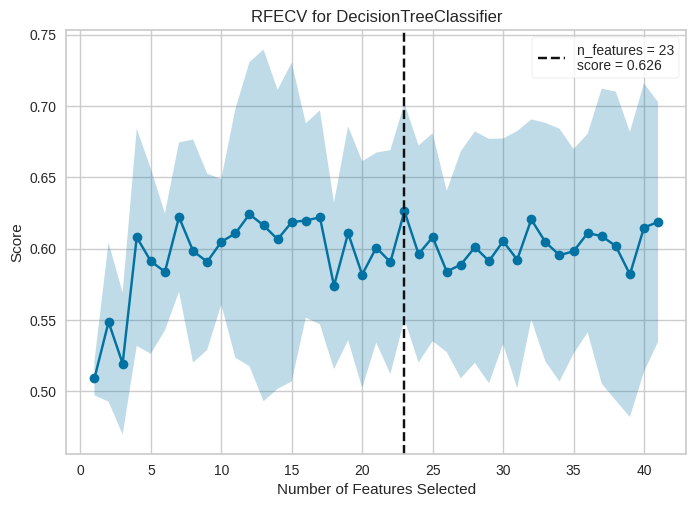

Selected Features Indices: [0, 5, 7, 8, 9, 10, 14, 15, 16, 17, 18, 20, 25, 26, 27, 28, 29, 31, 35, 36, 38, 39, 40]
Time taken: 9.872896194458008 seconds


In [12]:

import time

# Record the start time
start_time = time.time()

estimator = DecisionTreeClassifier(random_state=random_state)
visualizer = RFECV(estimator=estimator, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring='f1_weighted')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure
# Access the selected features
selected_features = visualizer.support_

# Print the indices of selected features
print("Selected Features Indices:", [i for i, selected in enumerate(selected_features) if selected])

# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken: {time_taken} seconds")


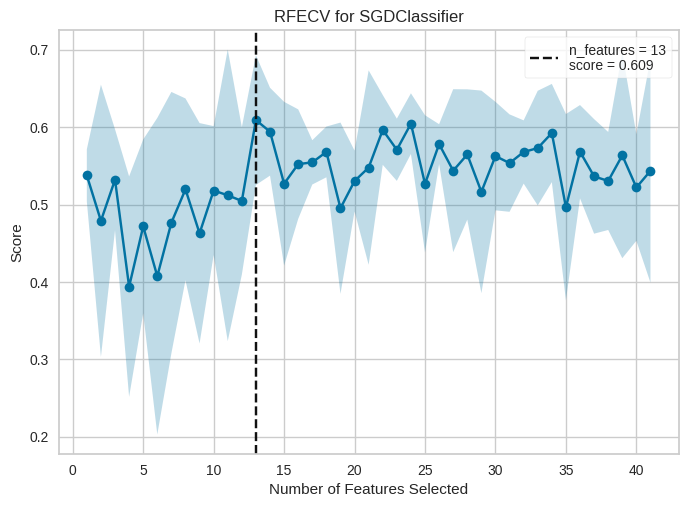

Selected Features Indices: [0, 1, 5, 9, 12, 14, 18, 22, 25, 26, 29, 36, 37]
Time taken: 10.541341304779053 seconds


In [13]:
import time

# Record the start time
start_time = time.time()

estimator = SGDClassifier(random_state=random_state)
visualizer = RFECV(estimator=estimator, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring='f1_weighted')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()
# Access the selected features
selected_features = visualizer.support_

# Print the indices of selected features
print("Selected Features Indices:", [i for i, selected in enumerate(selected_features) if selected])

# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken: {time_taken} seconds")


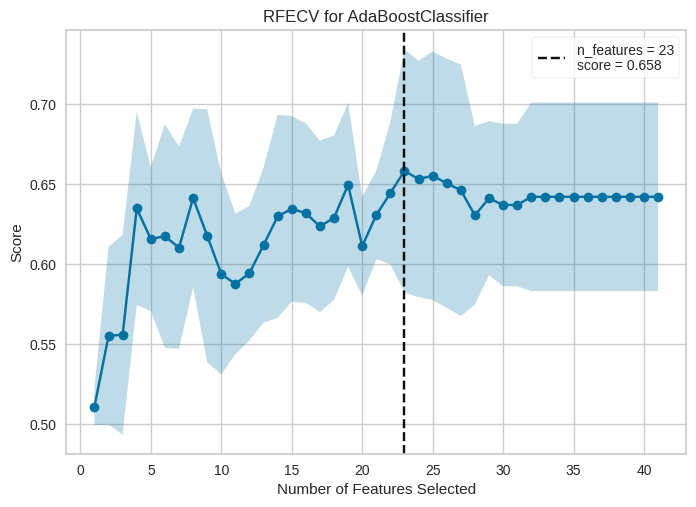

Selected Features Indices: [0, 2, 4, 5, 7, 8, 9, 10, 12, 15, 17, 18, 20, 22, 24, 26, 28, 29, 31, 33, 34, 36, 37]
Time taken: 411.09513783454895 seconds


In [14]:

import time

# Record the start time
start_time = time.time()

estimator = AdaBoostClassifier(random_state=random_state)
visualizer = RFECV(estimator=estimator, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring='f1_weighted')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()
# Access the selected features
selected_features = visualizer.support_

# Print the indices of selected features
print("Selected Features Indices:", [i for i, selected in enumerate(selected_features) if selected])


# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken: {time_taken} seconds")


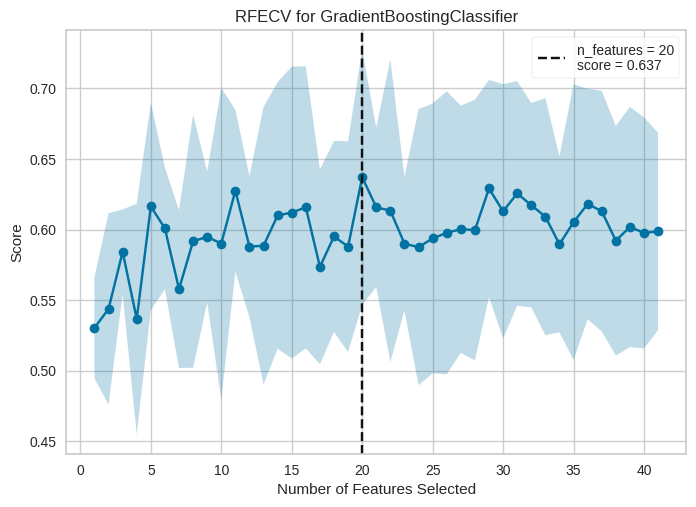

Selected Features Indices: [0, 1, 5, 6, 7, 8, 9, 10, 11, 14, 17, 20, 22, 26, 28, 29, 31, 32, 35, 40]
Time taken: 578.123265504837 seconds


In [15]:

import time

# Record the start time
start_time = time.time()

estimator = GradientBoostingClassifier()
visualizer = RFECV(estimator=estimator, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring='f1_weighted')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()
# Access the selected features
selected_features = visualizer.support_

# Print the indices of selected features
print("Selected Features Indices:", [i for i, selected in enumerate(selected_features) if selected])


# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken: {time_taken} seconds")


In [16]:
X_train, y_train=X_train_resampled, y_train_resampled

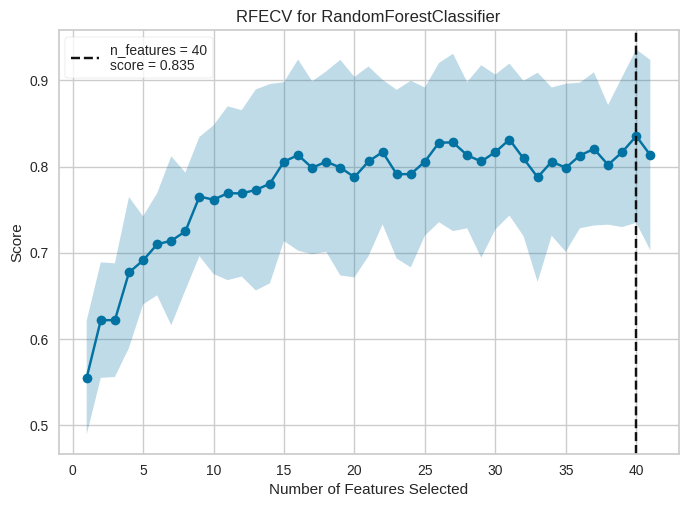

Selected Features Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Time taken: 804.6006927490234 seconds


In [17]:
import time

# Record the start time
start_time = time.time()

cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='accuracy')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()

# Access the selected features
selected_features = visualizer.support_

# Print the indices of selected features
print("Selected Features Indices:", [i for i, selected in enumerate(selected_features) if selected])


# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken: {time_taken} seconds")

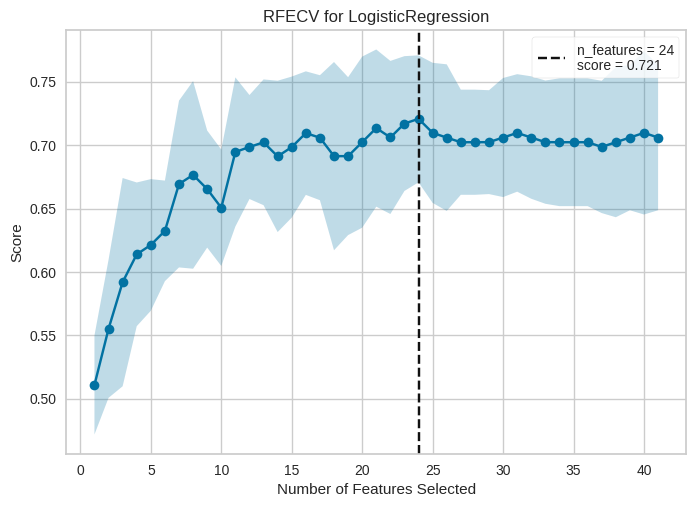

Selected Features Indices: [0, 1, 4, 5, 9, 10, 11, 12, 14, 18, 19, 22, 24, 25, 26, 28, 29, 30, 31, 32, 35, 36, 37, 38]
Time taken: 62.182161808013916 seconds


In [18]:
import time

# Record the start time
start_time = time.time()

estimator = LogisticRegression(random_state=random_state)
visualizer = RFECV(estimator=estimator, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring='accuracy')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Access the selected features
selected_features = visualizer.support_

# Print the indices of selected features
print("Selected Features Indices:", [i for i, selected in enumerate(selected_features) if selected])

# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken: {time_taken} seconds")

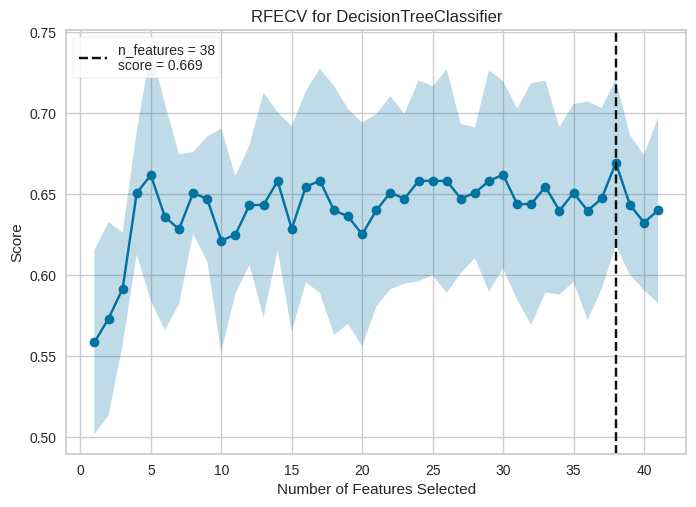

Selected Features Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40]
Time taken: 11.445012092590332 seconds


In [19]:
import time

# Record the start time
start_time = time.time()

estimator = DecisionTreeClassifier(random_state=random_state)
visualizer = RFECV(estimator=estimator, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring='accuracy')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure
# Access the selected features
selected_features = visualizer.support_

# Print the indices of selected features
print("Selected Features Indices:", [i for i, selected in enumerate(selected_features) if selected])

# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken: {time_taken} seconds")


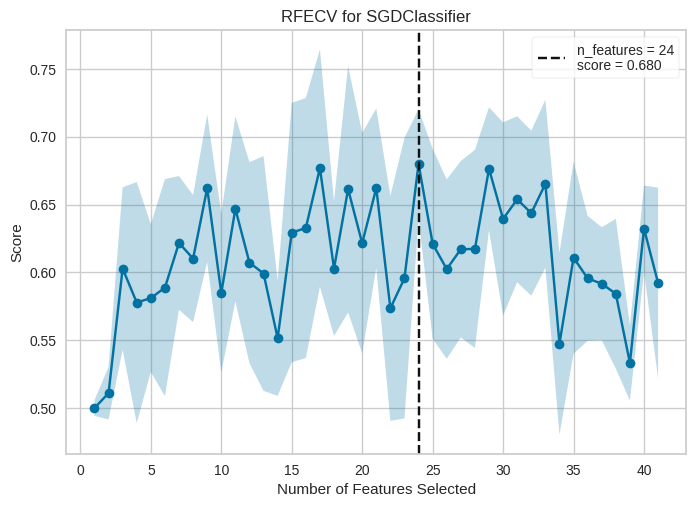

Selected Features Indices: [0, 1, 2, 4, 5, 7, 9, 10, 11, 12, 13, 14, 19, 21, 22, 24, 25, 26, 28, 29, 31, 35, 37, 38]
Time taken: 12.03499150276184 seconds


In [20]:
import time

# Record the start time
start_time = time.time()

estimator = SGDClassifier(random_state=random_state)
visualizer = RFECV(estimator=estimator, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring='accuracy')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()
# Access the selected features
selected_features = visualizer.support_

# Print the indices of selected features
print("Selected Features Indices:", [i for i, selected in enumerate(selected_features) if selected])

# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken: {time_taken} seconds")

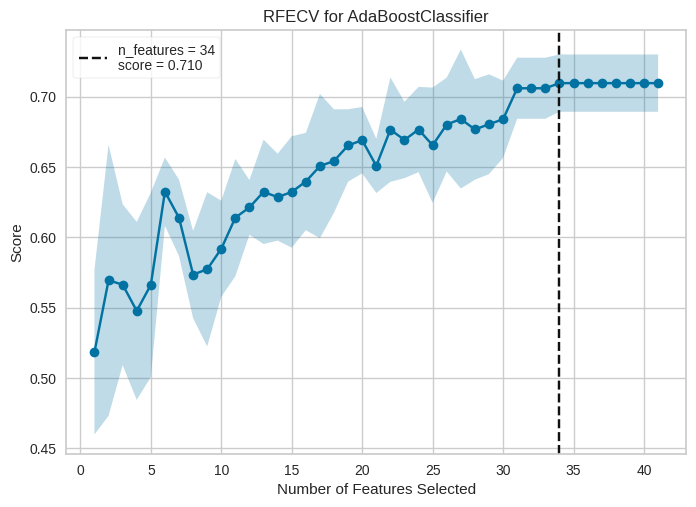

Selected Features Indices: [0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28, 29, 31, 34, 35, 36, 37, 38, 39, 40]
Time taken: 421.1246545314789 seconds


In [21]:
import time

# Record the start time
start_time = time.time()

estimator = AdaBoostClassifier(random_state=random_state)
visualizer = RFECV(estimator=estimator, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring='accuracy')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()
# Access the selected features
selected_features = visualizer.support_

# Print the indices of selected features
print("Selected Features Indices:", [i for i, selected in enumerate(selected_features) if selected])


# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken: {time_taken} seconds")